# Power and false positives

Fall 2022: Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# Power analysis

Suppose we're measuring expression
of many ($\sim$ 1,000) genes
in a bunch of organisms at night and during the day.
We'd like to know which genes are expressed 
at different levels in night and day, and by how much.

However, gene expression is highly variable: some genes
differ much more between individuals than others.
Here's a model for $X$, the difference in log gene expression
of a random gene in a random individual:
$$ \begin{aligned}
    \text{mean difference:} \qquad M &\sim \begin{cases} 3 \qquad &\text{with probability}\; 1/2 \\ 0 \qquad &\text{with probability}\; 1/2 \end{cases} \\
    \text{SD difference:} \qquad D &\sim \text{Exponential}(\text{mean}=2) \\
    \text{measured difference:} \qquad X &\sim \text{Normal}(\text{mean}=M, \text{sd}=D) .
\end{aligned}$$

*Goals:* We will want to, in the real data,

- Identify genes that we're sure are differentially expressed.
- Estimate how different their expression levels are.

So, let's simulate from this and test out our methods.

## Simulate

In [2]:
n = 1000
num_samples = 20
M = rng.choice([0, 3], size=n)
D = rng.exponential(scale=2, size=n)
X = np.array([rng.normal(loc=M, scale=D, size=n) for _ in range(num_samples)])
mean_X = np.mean(X, axis=0)
sd_X = np.std(X, axis=0)

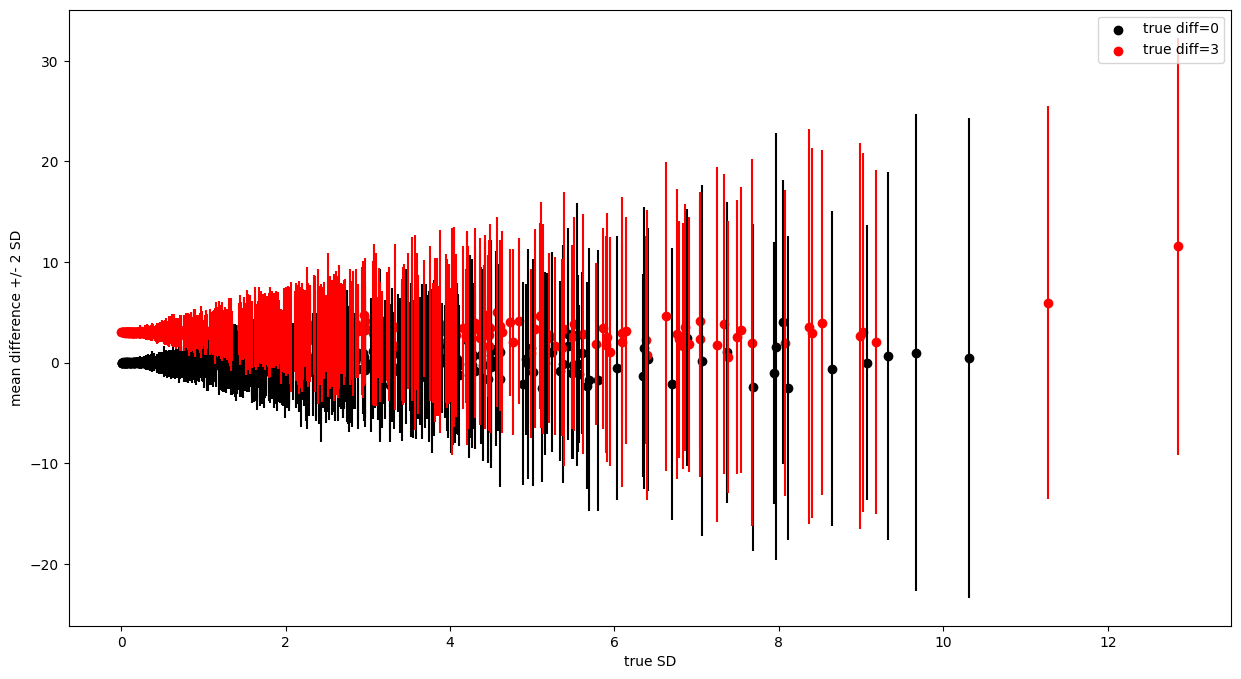

In [3]:
from matplotlib.collections import LineCollection
fig, ax = plt.subplots()

for Mval, col in [(0, 'black'), (3, 'red')]:
    ut = (M == Mval)
    segs = [[(d, m - 2 * s), (d, m + 2 * s)] for d, m, s in zip(D[ut], mean_X[ut], sd_X[ut])]
    ax.add_collection(LineCollection(segs, colors=col))
    ax.scatter(D[ut], mean_X[ut], c=col, label=f'true diff={Mval}')

ax.set_xlabel("true SD"); ax.set_ylabel("mean difference +/- 2 SD")
ax.legend();

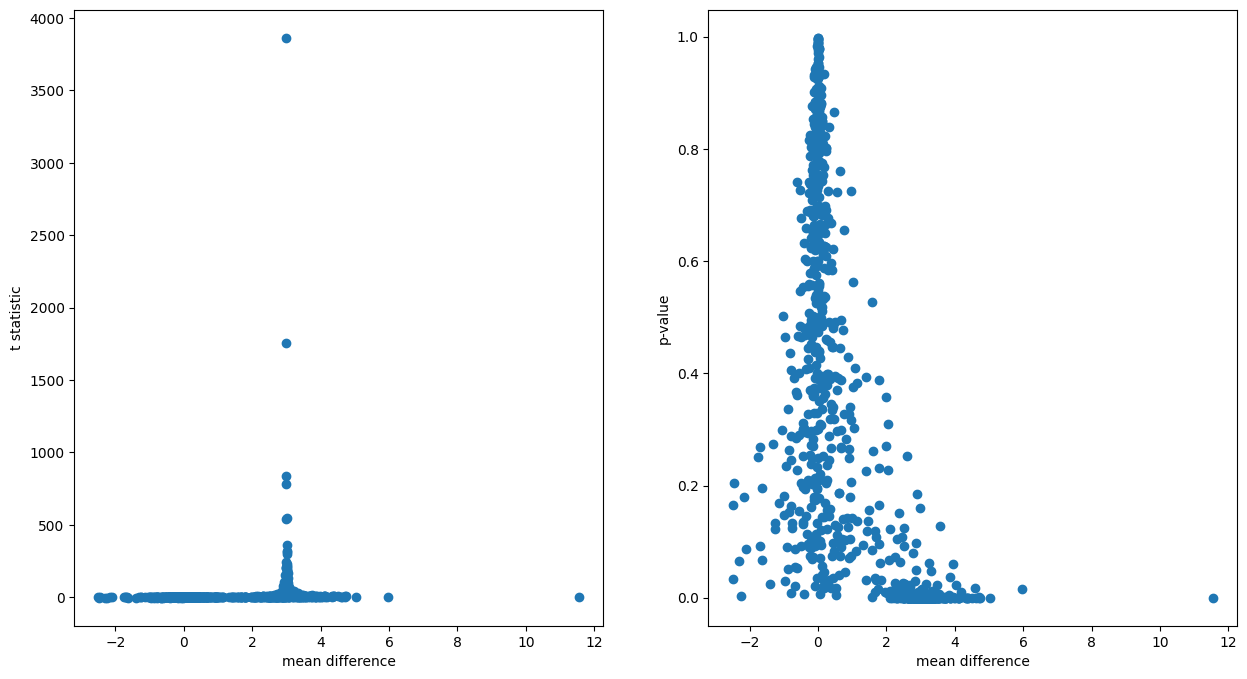

In [4]:
import scipy.stats

tt = scipy.stats.ttest_1samp(X, axis=0, popmean=0)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(mean_X, tt.statistic)
ax1.set_xlabel("mean difference"); ax1.set_ylabel("t statistic")
ax2.scatter(mean_X, tt.pvalue)
ax2.set_xlabel("mean difference"); ax2.set_ylabel("p-value");

## In class

So, how will we do this?

- Identify genes that we're sure are differentially expressed.
- Estimate how different their expression levels are.